<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_07_nn_zeroV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import scipy as sc
import numpy as np
import h5py
import matplotlib.pylab as plt

In [2]:
data_train= "train_catvnoncat_.h5"
train_dataset = h5py.File(data_train, "r")

data_test= "test_catvnoncat.h5"
test_dataset = h5py.File(data_test, "r")

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'train_catvnoncat_.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
train_dataset.keys()

In [ ]:
# Read the data
xtrain_classes, xtrain, train_label =\
train_dataset["list_classes"],train_dataset["train_set_x"],train_dataset["train_set_y"]

test_classes, xtest,test_label =\
test_dataset["list_classes"],test_dataset["test_set_x"],test_dataset["test_set_y"]


NameError: ignored

In [ ]:
np.shape(xtrain)

NameError: ignored

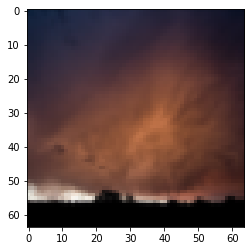

In [ ]:
plt.imshow(xtrain[208])

In [ ]:
np.shape(xtrain[0])

NameError: ignored

In [ ]:
np.reshape(xtrain[0], 64*64*3)

array([17, 31, 56, ...,  0,  0,  0], dtype=uint8)

In [ ]:
xtrain_= np.reshape(xtrain,(209, 64*64*3))/255
xtest_ = np.reshape(xtest,(50, 64*64*3))/255

In [ ]:
len(xtrain_[208])

12288

In [ ]:
64*64*3

12288

Construyamos una red neuronal con una capa de entrada, una capa de salida con una red y L-1 redes ocultas.

# Con m datos de entrenamientos.

Para $m$ datos de entrenamiento, las expresión anteriores pueden ser resumidas en las siguientes ecuaciones



\begin{equation}
\begin{bmatrix}
z_1^{(0)}  &z_1^{(1)} & .&.& .&z_1^{(m)}\\
z_2^{(0)}  &z_2^{(1)} &. &.&  .&z_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
z_{n^{[l]}}^{(0)}&z_{n^{[l]}}^{(1)} & . & .& .& z_{n^{[l]}}^{(m)}        \\
\end{bmatrix}^{[l]}=
\begin{bmatrix}
\theta_{11} & \theta_{12} & . & .& .& \theta_{1n^{[l-1]}}\\
\theta_{21} & \theta_{22} & . & .& .& \theta_{2n^{[l-1]}}\\
. & .  & . &   & & .\\
. & .  &   & . & & .\\
. & .  &   &  & .& .\\
\theta_{n^{[l]}1} & \theta_{n^{[l]}2} & . & .& .& \theta_{n^{[l]}n^{[l-1]}}\\
\end{bmatrix}^{[l]}_{n^{[l]} \times n^{[l-1]}}
\begin{bmatrix}
a_1^{(0)}  &a_1^{(1)} & .&.& .&a_1^{(m)}\\
a_2^{(0)}  &a_2^{(1)} &. &.&  .&a_2^{(m)}\\
.          & .        &. & &   &.      \\
.          & .        &  &. &   &.      \\
.          & .        &  &  & .&      \\
a_{n^{[L-1]}}^{(0)}&a_{n^{[L-1]}}^{(1)} & . & .& .& a_{n^{[L-1]}}^{(m)}        \\
\end{bmatrix}^{[l-1]} +
\begin{bmatrix}
b_1 \\
b_2 \\
. \\
. \\
. \\
b_{n^{[l]}}\\
\end{bmatrix}^{[l]}
\end{equation}


Escrito de una formas mas compacta tenemos que:


\begin{equation}
[ \vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ]= \Theta^{[l]} [\vec{A}^{[l-1](0)},\vec{A}^{[l-1](1)},...,\vec{A}^{[l-1](m)} ]+ \vec{b}^{[l]}
\end{equation}

Aplicando la funcion de activación:

\begin{equation}
[\vec{A}^{[l](0)},\vec{A}^{[l](1)},...,\vec{A}^{[l](m)} ]=f([\vec{Z}^{[l](0)},\vec{Z}^{[l](1)},...,\vec{Z}^{[l](m)}  ])
\end{equation}

Las dimensiones de las expresiones anteriores, pueden ser resumidas en lo siguiente:

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$




## Topología de la red.

1. Construir un clase  que permita definir una red neuronal con la topología
deseada y la función de activación para cada capa, para ello deberá construir una funcion Topology con el número de capas de la red neuronal :

Topology = [n_x, n_h1, n_h2, n_h3, ...,n_y]

En este caso:
- $n^{[0]}=n_x$ seran los valores de entradas de la capa de entrada
- $n^{[1]}=n_{h1}$ Primera capa oculta de la red neuronal
- $n^{[2]}=n_{h2}$ Segunda capa oculta de la red neuronal

.

.

.


- $n^{[l]}=n_{hl}$ Segunda capa oculta de la red neuronal
.

.

.

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal

donde

- $\mathrm{n_x}$: valores de entrada
- $\mathrm{n_{h1}}$: hidden layer 1
- $\mathrm{n_{h2}}$: hidden layer 2
- $\mathrm{n_y}$: last layer

- $n^{[L]}=n_{y}$ Segunda capa oculta de la red neuronal


También definir una lista con las funciones de activaciones para cada capa.


activation=[None, relu, relu, relu, ...,sigmoid]

  


a. Cada unas de las capas deberá tener los parámetros de inicialización de manera aleatoria:


La matriz de parametros para cada capa debera tener:


$\mathrm{dim(\vec{b}^{[l]})}=n^{[l]}$

$\mathrm{dim(\vec{\Theta}^{[l]})}=n^{[l]}\times n^{[l-1]}$

Lo anteriores parametros deberán estar en el constructor de la clase.


b. Construya un metodo llamado output cuya salida serán los valores de Z y A


$\mathrm{dim(\vec{\cal{A}}^{[l]})}=n^{[l-1]}\times m $

$\mathrm{dim(\vec{\cal{Z}}^{[l]})}=n^{[l]}\times m $.




Se sugiere para cada capa emplear programación orientada a objetos definida de la siguiente manera:

```
class layer_nn():
  def __init__(self, act_fun, nlayer_present, nlayer_before):
    self.theta = 2*np.random.random((nlayer_present, nlayer_before)) - 1
    self.B = 2*np.random.random((nlayer_present,1)) - 1
    self.act_fun = act_fun

  def output(self, Z, A ):
    self.Z = Z
    self.A = A



def act_function(x, activation):
  if activation=="sigmoid":
    f = lambda x: 1/(1+np.exp(-x))
    fp = f(x)*(1-f(x))
    return f, fp
  
  elif activation == "tanh":
    f = lambda x: np.tanh
    return tanh
  else :
    return 0
```

In [17]:
# clase para una capa de la red neuronal

# inicializa los parámetros de una capa de la red neuronal:

class LayerNN:
    def __init__(self, act_fun, nlayer_present, nlayer_before):

        self.theta = 2 * np.random.random((nlayer_present, nlayer_before)) - 1  
        self.b = 2 * np.random.random((nlayer_present, 1)) - 1 
        self.act_fun = act_fun

    # aplica la función de activación a Z:
    def activate(Z, act_fun):
        if act_fun == "sigmoid":
            return 1 / (1 + np.exp(-Z))
        elif act_fun == "relu":
            return np.maximum(0, Z)
        elif act_fun == "tanh":
            return np.tanh(Z)

In [18]:
# clase para la red neuronal

# inicializa una red neuronal con una topología y funciones de activación definidas:

class NeuralNetwork:
    def __init__(self, topology, activations):

        # guardamos las capas de la red neuronal
        self.layers = []
        for i in range(1, len(topology)):
            # creamos cada capa de la red con sus pesos, bias y función de activación
            self.layers.append(LayerNN(activations[i], topology[i], topology[i - 1]))

    # calcula el paso hacia adelante (forward pass) en la red neuronal:
    def forward(self, X):

        Z_list = []
        A_list = [X]

        for layer in self.layers:
            # calculamos Z = theta * A + b:
            Z = np.dot(layer.theta, A_list[-1]) + layer.b

            # aplicamos la función de activación para obtener A:
            A = LayerNN.activate(Z, layer.act_fun)

            Z_list.append(Z)
            A_list.append(A)

        return Z_list, A_list # Z y A para todas las capas

In [19]:
# definición de la topología y las funciones de activación:

Topology = [3, 5, 4, 2]  # 3 entradas, dos capas ocultas (5 y 4 neuronas), 2 salidas
activation = [None, "relu", "relu", "sigmoid"]

# inicialización de la red
nn = NeuralNetwork(Topology, activation)

# generación de datos aleatorios para la prueba
X = np.random.random((3, 10))  

# propagación hacia adelante
Z, A = nn.forward(X)


In [20]:
print("Valores Z para cada capa:")
for i, z in enumerate(Z):
    print(f"Capa {i + 1}:\n{z}\n")

print("Valores A (activaciones) para cada capa:")
for i, a in enumerate(A):
    print(f"Capa {i}:\n{a}\n")

Valores Z para cada capa:
Capa 1:
[[ 0.5418264   0.86161512  1.17566639  1.02172798  0.83672948  0.43566927
   0.99321387  0.43867044  0.2462564   0.37899926]
 [ 0.21576141  0.50788595  0.70393301  0.44161921  0.19303531  0.33142353
   0.28829693  0.13048497  0.00174252 -0.08673315]
 [-0.7855611  -0.450855   -0.14981629 -0.35983782 -0.58747047 -0.81328468
  -0.43979002 -0.8878142  -1.06842605 -1.01163315]
 [-0.71480029 -0.62590598 -1.16873222 -1.08267727 -0.88376639 -0.79999149
  -1.04109685 -0.9267983  -1.18454949 -1.10143316]
 [-0.20714987 -0.07337827 -0.2976348  -0.5657562  -0.7298418   0.15191282
  -0.81464978 -0.28402987 -0.3290851  -0.67396275]]

Capa 2:
[[ 5.01038524e-01  5.99227976e-01  6.80522825e-01  6.12983433e-01
   5.42921395e-01  4.51873384e-01  5.83024878e-01  4.70857013e-01
   4.19611671e-01  4.39878045e-01]
 [ 2.52985908e-01 -1.42945661e-02 -2.79327584e-01 -1.54078773e-01
  -1.68886860e-03  2.83638413e-01 -1.33816602e-01  3.39455207e-01
   5.01594562e-01  3.87197478e-0

2. Construir un generalizacion de la red, en el que entrada el valor inicial
y la red neuronal completa arroje la salida y la actualizacion de la red con los parametros deseados:

  ```
  A, nn = forward_pass(A0, nn_red)

 ```

Ahora, para este punto, seguimos realizando la propagación hacia adelante como en el punto 1, pero la hacemos más general y fácil de usar creando una función llamada `forward_pass`. Esta función toma los datos de entrada y la red neuronal completa, y nos devuelve directamente la salida final de la red junto con la red actualizada, haciendo el proceso más modular y listo para integrarse en tareas más complejas como el entrenamiento.

In [25]:
class LayerNN:
    def __init__(self, act_fun, nlayer_present, nlayer_before):
        self.theta = 2 * np.random.random((nlayer_present, nlayer_before)) - 1
        self.b = 2 * np.random.random((nlayer_present, 1)) - 1
        self.act_fun = act_fun

    def activate(Z, act_fun):
        if act_fun == "sigmoid":
            return 1 / (1 + np.exp(-Z))
        elif act_fun == "relu":
            return np.maximum(0, Z)
        elif act_fun == "tanh":
            return np.tanh(Z)

class NeuralNetwork:
    def __init__(self, topology, activations):
        self.layers = []
        for i in range(1, len(topology)):
            self.layers.append(LayerNN(activations[i], topology[i], topology[i - 1]))

    def forward(self, X):
        Z_list = []
        A_list = [X]

        for layer in self.layers:
            Z = np.dot(layer.theta, A_list[-1]) + layer.b
            A = LayerNN.activate(Z, layer.act_fun)

            Z_list.append(Z)
            A_list.append(A)

        return Z_list, A_list

# generalización de la red
# esta función realiza el forward pass y retorna la salida final y la red actualizada
def forward_pass(A0, nn_red):

    # ejecutamos el forward pass
    _, A_list = nn_red.forward(A0)

    return A_list[-1], nn_red # la salida final es la última lista de activaciones

In [26]:
Topology = [3, 5, 4, 2] 
activation = [None, "relu", "relu", "sigmoid"]

nn = NeuralNetwork(Topology, activation)

A0 = np.random.random((3, 10))

A_final, nn_updated = forward_pass(A0, nn)

print("Salida final de la red:")
print(A_final)

Salida final de la red:
[[0.67349452 0.64170611 0.68385061 0.68120311 0.66025139 0.68385061
  0.69632485 0.68036262 0.65916344 0.66207036]
 [0.68645501 0.72617692 0.67241808 0.67606029 0.70360252 0.67241808
  0.66652915 0.67720879 0.70497236 0.70129926]]



3. Encontrar la funcion de coste.


$$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$



In [27]:
def compute_cost(Y, AL):
    m = Y.shape[1]  
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    return np.squeeze(cost)  

In [29]:
np.random.seed(23)  

A0 = np.random.random((3, 10))  # 10 ejemplos con 3 características cada uno
Y_test = np.random.randint(0, 2, (1, 10))  # etiquetas reales (0 o 1) para 10 ejemplos

# realizamos el forward pass
_, A_list = nn.forward(A0)
AL = A_list[-1]  # salida final de la red

cost = compute_cost(Y_test, AL)


In [30]:
print("Etiquetas reales (Y):", Y_test)
print("Predicciones de la red (AL):", AL)
print("Costo calculado:", cost)

Etiquetas reales (Y): [[0 1 0 0 0 1 0 0 0 0]]
Predicciones de la red (AL): [[0.70707734 0.65105597 0.69085001 0.68385061 0.69984748 0.6848591
  0.68385061 0.68385061 0.66737445 0.68021989]
 [0.67384999 0.71499972 0.66958184 0.67241808 0.6648321  0.67227288
  0.67241808 0.67241808 0.70049207 0.67740346]]
Costo calculado: 1.9846923013997002


Las etiquetas reales $(Y)$ muestran los valores esperados para los 10 ejemplos, donde la mayoría pertenecen a la clase negativa (0) y solo dos ejemplos corresponden a la clase positiva (1).

Los valores de las predicciones de la red $(AL)$ están muy concentrados entre 0.65 y 0.71, lo que nos indica que la red no está diferenciando claramente entre las clases. Idealmente, las probabilidades deberían acercarse a 1 para los ejemplos positivos y a 0 para los negativos, pero eso no está ocurriendo.

El costo calculado (1.98) es relativamente alto, lo que señala que las predicciones de la red no están alineadas con las etiquetas reales. Esto sugiere que los parámetros iniciales de la red no están optimizados, y que la red no ha pasado por un proceso de entrenamiento para ajustar los pesos y biases.

Para mejorar el desempeño de la red, sería necesario entrenarla utilizando un algoritmo de optimización, como el descenso de gradiente, para reducir el costo y ajustar mejor las predicciones a las etiquetas reales.


4. Construir un codigo que permita realizar el BackwardPropagation


# Backward Propagation

Para una capa $l$ arbitraria tenemos que:

- \begin{equation}
d\Theta^{[l]} =  d{\cal Z}^{(i)[l]} Trans(A)^{(i)[l-1]} = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} ) Trans(A)^{(i)[l-1]}
\end{equation}

- \begin{equation}
db^{[l]} =  d{\cal Z}^{(i)[L]}  = dA^{(i)[l]} f'({\cal Z}^{(i)[l]} )
\end{equation}
```
db_L =  m_*np.sum(dZ, axis=1, keepdims=True)
```
Los valores de dA pueden ser escritos como:
- \begin{equation}
dA^{(i)[l-1]} = \Theta^{l} \cdot dZ^{(i)[l]}
\end{equation}





$ dZ^{[l]} = dA^{[l]} * f'^{[l]} (Z^{[l]}) $
$ d\Theta^{[l]} = \frac{\partial \mathcal{J} }{\partial \Theta^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{1}$
$ db^{[l]} = \frac{\partial \mathcal{J} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{2}$
$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = \theta^{[l] T} dZ^{[l]} \tag{3}$


Para la capa L esima:

```
dAL = -(np.divide(Y, A) - np.divide(1 - Y, 1 - A))
```

# Aplicacion gradiente descendente

$$ \Theta^{[l]} = \Theta^{[l]} - \alpha \text{ } d\Theta^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$


In [32]:
class NeuralNetwork:
    def __init__(self, topology, activations):
        self.layers = []
        for i in range(1, len(topology)):
            self.layers.append(LayerNN(activations[i], topology[i], topology[i - 1]))

    def forward(self, X):
        Z_list = []
        A_list = [X]
        for layer in self.layers:
            Z = np.dot(layer.theta, A_list[-1]) + layer.b
            A = LayerNN.activate(Z, layer.act_fun)
            Z_list.append(Z)
            A_list.append(A)
        return Z_list, A_list

    def backward(self, X, Y, alpha):
        m = X.shape[1]  # número de ejemplos
        Z_list, A_list = self.forward(X)  # realizamos el forward pass
        dA = -(np.divide(Y, A_list[-1]) - np.divide(1 - Y, 1 - A_list[-1]))  # dAL inicial

        for l in reversed(range(len(self.layers))):
            current_layer = self.layers[l]
            Z = Z_list[l]
            A_prev = A_list[l]

            # derivada de la función de activación
            if current_layer.act_fun == "sigmoid":
                dZ = dA * (A_list[l + 1] * (1 - A_list[l + 1]))
            elif current_layer.act_fun == "relu":
                dZ = dA * (Z > 0)

            # gradientes de pesos y bias
            dTheta = (1 / m) * np.dot(dZ, A_prev.T)
            db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)

            # actualización de dA para la capa anterior
            if l > 0:
                dA = np.dot(current_layer.theta.T, dZ)

            # actualizamos los parámetros
            current_layer.theta -= alpha * dTheta
            current_layer.b -= alpha * db

In [ ]:
class LayerNN:
    def __init__(self, act_fun, nlayer_present, nlayer_before):
        self.theta = 2 * np.random.random((nlayer_present, nlayer_before)) - 1
        self.b = 2 * np.random.random((nlayer_present, 1)) - 1
        self.act_fun = act_fun

    def activate(Z, act_fun):
        if act_fun == "sigmoid":
            return 1 / (1 + np.exp(-Z))
        elif act_fun == "relu":
            return np.maximum(0, Z)

In [33]:
np.random.seed(23)  
Topology = [3, 5, 4, 1] 
activation = [None, "relu", "relu", "sigmoid"]  
nn = NeuralNetwork(Topology, activation)

X = np.random.random((3, 10))  
Y = np.random.randint(0, 2, (1, 10)) 

# ejecución de la propagación hacia atrás con tasa de aprendizaje alpha
alpha = 0.01
nn.backward(X, Y, alpha)


In [34]:
print("Parámetros actualizados (theta y b) para la última capa:")
print("Theta:", nn.layers[-1].theta)
print("b:", nn.layers[-1].b)

Parámetros actualizados (theta y b) para la última capa:
Theta: [[-0.64079636 -0.51883294  0.01518211 -0.2065086 ]]
b: [[-0.03178028]]
